In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
x_data = np.linspace(0.0,10.0,1000000)

In [8]:
noise  = np.random.randn(len(x_data))
noise

array([ 1.21009369,  1.03581854, -1.04351823, ...,  0.30475655,
       -1.73367345,  0.09564343])

In [12]:
y_true = (0.5 * x_data) + 5 + noise

In [14]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [15]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [16]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [17]:
y_df.head()

,Y
0,6.210094
1,6.035824
2,3.956492
3,7.736934
4,5.930980


In [18]:
my_data = pd.concat([x_df,y_df],axis=1)

In [20]:
my_data.head()

,X Data,Y
0,0.00000,6.210094
1,0.00001,6.035824
2,0.00002,3.956492
3,0.00003,7.736934
4,0.00004,5.930980


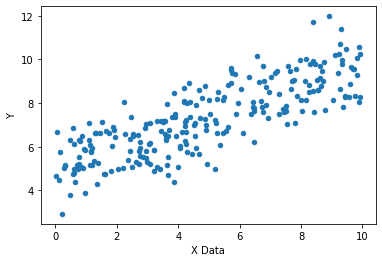

In [23]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [24]:
batch_size = 8

In [25]:
a = tf.Variable(0.81)
b = tf.Variable(0.17)

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
xph = tf.placeholder(tf.float32,[batch_size])

In [27]:
yph = tf.placeholder(tf.float32,[batch_size])

In [28]:
y_model = a * xph + b

In [29]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [30]:
optimizr = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [31]:
train = optimizr.minimize(error)

In [32]:
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed  = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
    
    model_a, model_b = sess.run([a,b])

In [35]:
model_a

0.4662885

In [36]:
model_b


4.862908

In [41]:
y_hat = x_data * model_a + model_b

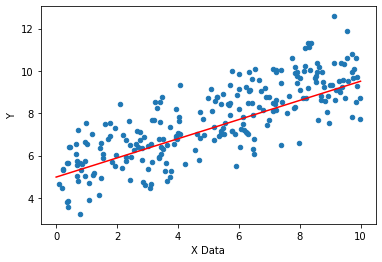

In [42]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')